In [4]:
from tensorflow.keras.applications import Xception
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Task

The task concerns the problem of image classification of sign language digits.

https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [5]:
X = np.load('dataset/X.npy')
y = np.load('dataset/Y.npy')
img_size = 64

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_test = X_test[:,:,:,np.newaxis]
X_train = X_train[:,:,:,np.newaxis]

def visualize_digits():
    image_index_list = [260, 900, 1800, 1600, 1400, 2061, 700, 500, 1111, 100]

    for number in range(10):
        plt.figure(figsize=(8,5))
        number_image = x_load[image_index_list[number]]
        plt.imshow(number_image.reshape(img_size, img_size), cmap="gray")
        title = "Sign " + str(number) 
        plt.title(title)
    plt.show()

# Basic CNN

In [1]:
target_size = (64, 64)
batch_size = 32

In [7]:
def build_base_cnn_model():
    model = Sequential()
    model.add(Conv2D(input_shape=(64, 64, 1), filters=64, kernel_size=(4,4), strides=(2)))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1)))
    model.add(MaxPooling2D(pool_size=4))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer = 'adam', 
        loss = 'categorical_crossentropy', 
        metrics = ['accuracy']
    )
    return model

base_cnn_model = build_base_cnn_model()
base_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 64)        1088      
_________________________________________________________________
activation (Activation)      (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        65600     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

## ImageDataGenerator for base case

In [9]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=batch_size,
)

validation_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=batch_size,
)

history_cnn = base_cnn_model.fit_generator(
    train_generator,  
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 29s 287ms/step - loss: 0.6470 - accuracy: 0.7899 - val_loss: 1.5897 - val_accuracy: 0.7332
Epoch 2/10
100/100 [==============================] - 29s 287ms/step - loss: 0.2645 - accuracy: 0.9160 - val_loss: 0.9592 - val_accuracy: 0.8413
Epoch 3/10
100/100 [==============================] - 29s 287ms/step - loss: 0.1443 - accuracy: 0.9588 - val_loss: 0.4442 - val_accuracy: 0.9294
Epoch 4/10
100/100 [==============================] - 29s 290ms/step - loss: 0.0773 - accuracy: 0.9813 - val_loss: 0.2265 - val_accuracy: 0.9443
Epoch 5/10
100/100 [==============================] - 31s 305ms/step - loss: 0.0587 - accuracy: 0.9844 - val_loss: 0.1672 - val_accuracy: 0.9326
Epoch 6/10
100/100 [==============================] - 30s 298ms/step - loss: 0.0304 - accuracy: 0.9937 - val_loss: 0.1269 - val_accuracy: 0.9514
Epoch 7/10
100/100 [==============================] - 28s 284ms/step - loss: 0.0409 - accuracy: 0.9882 - val_loss: 0.3121 - val_ac

In [11]:
X_test[0].shape

(64, 64, 1)

9, 9
3, 3
9, 9
0, 0
8, 8
2, 2
9, 9
Poprawnie oznaczone 7 z 10


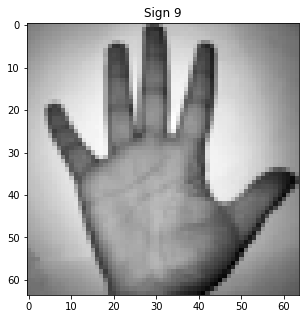

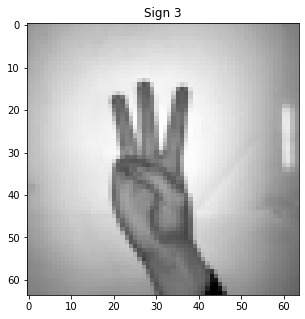

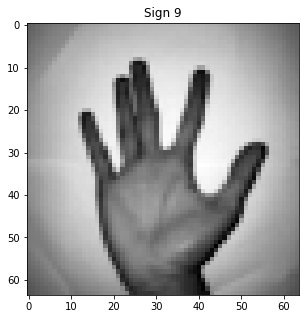

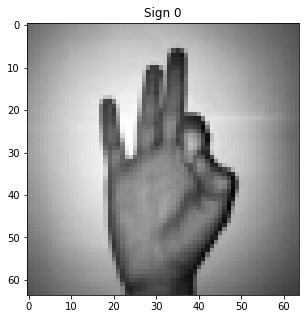

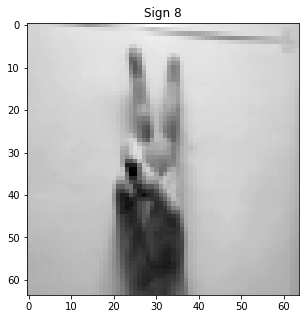

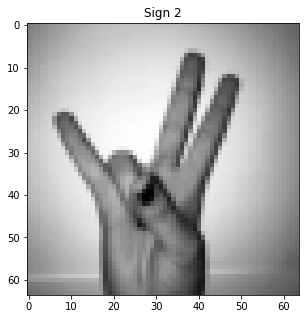

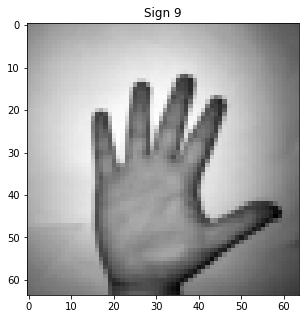

In [67]:
import pdb

correct_guesses = 0
number_of_samples = 1

for i in range(number_of_samples):
    img_to_show = X_test[i]
    labels = y_test[i]
    max_label = labels.argmax()
    img_to_predict = img_to_show[np.newaxis,:,:,:]
    
    prediction = model.predict(img_to_predict)
    max_pred = prediction.argmax()
#     pdb.set_trace()
    if max_label == max_pred:
        correct_guesses +=1
        
#     print(labels)
        print(f"{max_pred}, {max_label}")
    
        plt.figure(figsize=(8,5))
        plt.imshow(img_to_show.reshape(img_size, img_size), cmap="gray")
        title = "Sign " + str(max_pred) 
        plt.title(title)

    
print(f"Poprawnie oznaczone {correct_guesses} z {number_of_samples}")
plt.show()


# Basic CNN with Data Augmentation
## ImageDataGenerator with Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
#     featurewise_center=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=20,
)

validation_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=20,
)
history_cnn_augmentation = model.fit_generator(
    train_generator,  
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 21s 206ms/step - loss: 1.1066 - accuracy: 0.6309 - val_loss: 0.2225 - val_accuracy: 0.9518
Epoch 2/30
100/100 [==============================] - 20s 199ms/step - loss: 0.8421 - accuracy: 0.7054 - val_loss: 0.2254 - val_accuracy: 0.9478
Epoch 3/30
100/100 [==============================] - 20s 200ms/step - loss: 0.7073 - accuracy: 0.7533 - val_loss: 0.2415 - val_accuracy: 0.9297
Epoch 4/30
100/100 [==============================] - 26s 258ms/step - loss: 0.6353 - accuracy: 0.7880 - val_loss: 0.2438 - val_accuracy: 0.9398
Epoch 5/30
 93/100 [==========================>...] - ETA: 1s - loss: 0.5913 - accuracy: 0.7986

# Transfer Learning - Xception

In [76]:

from tensorflow.keras.applications import Xception

conv_base = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(64, 64, 1)
)

conv_base.summary()

ValueError: The input must have 3 channels; got `input_shape=(64, 64, 1)`

In [74]:
conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [75]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)


Epoch 1/30


ValueError: Error when checking input: expected xception_input to have shape (299, 299, 3) but got array with shape (64, 64, 1)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()